In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
digits = load_digits()

In [5]:
X = digits.data
y = digits.target

In [6]:
# Trainig and Testing Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Pipeline for Logistic Regression
logreg_pipeline = Pipeline([
('scaler', StandardScaler()),
('logreg', LogisticRegression())
])

# Parameters Grid for Logistic Regression
logreg_param_grid = {
'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
'logreg__penalty': ['l1', 'l2']
}

# Grid Search for Logistic Regression
logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, scoring='accuracy')

# Fitting for Logistic Regression
logreg_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [8]:
# Pipeline for SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Parameters Grid for SVM
svm_param_grid = {'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
                   'svm__C': [0.1, 1, 10, 100], 
                   'svm__gamma': [0.1, 1, 10, 100]
                  }

# Grid Search for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy')

# Fitting for SVM
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.1, 1, 10, 100],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [9]:
# Pipeline for KMeans
Knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameters Grid for KMeans
Knn_param_grid = {
    'knn__n_neighbors': [5, 10, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Grid Search for KMeans
Knn_grid_search = GridSearchCV(Knn_pipeline, Knn_param_grid, cv=5, scoring='accuracy')

# Fitting for KMeans
Knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [5, 10, 15],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [10]:
# Pipeline for KMeans
Naive_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Parameters Grid for KMeans
Naive_param_grid = {
    'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

# Grid Search for KMeans
Naive_grid_search = GridSearchCV(Naive_pipeline, Naive_param_grid, cv=5, scoring='accuracy')

# Fitting for KMeans
Naive_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                               1e-05]},
             scoring='accuracy')

In [11]:
# Pipeline for Decision Tree
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier())
])

# Parameters Grid for Decision Tree
tree_param_grid = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [None, 5, 10, 15, 20],
    'dtc__min_samples_split': [2, 5, 10],
    'dtc__min_samples_leaf': [1, 2, 4]
}

# Grid Search for Decision Tree
tree_grid_search = GridSearchCV(tree_pipeline, tree_param_grid, cv=5, scoring='accuracy')

# Fitting for Decision Tree
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': [None, 5, 10, 15, 20],
                         'dtc__min_samples_leaf': [1, 2, 4],
                         'dtc__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [12]:
print('Logistic Regression:')
print(logreg_grid_search.best_params_)
print('SVM:')
print(svm_grid_search.best_params_)
print('Knn:')
print(Knn_grid_search.best_params_)
print('Naive:')
print(Naive_grid_search.best_params_)
print('Tree:')
print(tree_grid_search.best_params_)

Logistic Regression:
{'logreg__C': 1, 'logreg__penalty': 'l2'}
SVM:
{'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Knn:
{'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Naive:
{'nb__var_smoothing': 1e-05}
Tree:
{'dtc__criterion': 'entropy', 'dtc__max_depth': 10, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 5}


In [13]:
logreg_best = logreg_grid_search.best_estimator_
svm_best = svm_grid_search.best_estimator_
Knn_best = Knn_grid_search.best_estimator_
Naive_best = Naive_grid_search.best_estimator_
tree_best = tree_grid_search.best_estimator_

In [14]:
logreg_preds = logreg_best.predict(X_test)
svm_preds = svm_best.predict(X_test)
Knn_preds = Knn_best.predict(X_test)
Naive_preds = Naive_best.predict(X_test)
tree_preds = tree_best.predict(X_test)

In [15]:
print('Logistic Regression accuracy:', accuracy_score(y_test, logreg_preds))
print('SVM accuracy:', accuracy_score(y_test, svm_preds))
print('KNN accuracy:', accuracy_score(y_test, Knn_preds))
print('Naive accuracy:', accuracy_score(y_test, Naive_preds))
print('Tree accuracy:', accuracy_score(y_test, tree_preds))

Logistic Regression accuracy: 0.9722222222222222
SVM accuracy: 0.9861111111111112
KNN accuracy: 0.975
Naive accuracy: 0.8583333333333333
Tree accuracy: 0.8888888888888888


In [16]:
test_preds = svm_best.predict(X_test)

In [17]:
test_preds

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, test_preds)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

In [20]:
import seaborn as sns

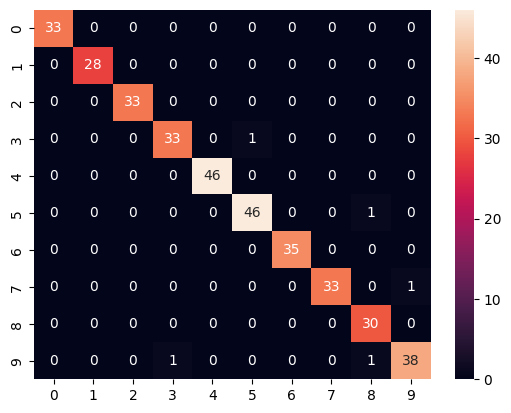

In [22]:
sns.heatmap(cm, annot = True);

In [25]:
import pickle

# Assuming that you have a trained model saved in a variable named 'model'
# and you want to save it to a file named 'model.pkl'
with open('Digits_Model.pkl', 'wb') as f:
    pickle.dump(svm_best, f)